In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import os 
import numpy as np
import json
import random

In [3]:
os.chdir('/content/drive/MyDrive/BMED8813_Covid/')
!pwd


/content/drive/MyDrive/BMED8813_Covid


In [ ]:

%run -i 'generate_pattern.py'
noncovid_sections = noncovid_pattern
covid_sections = covid_pattern 
print(len(noncovid_sections))

[frozenset({'C-AA-day'})]
2267


In [ ]:
%run -i 'generate_pattern_healthy.py'
healthy_sections = healthy_pattern
print(len(healthy_sections))

5597


In [ ]:
%run -i 'generate_pattern_sleep.py'
covid_sleep_sections = covid_sleep_pattern
noncovid_sleep_sections = noncovid_sleep_pattern
print(len(healthy_sections))

[]
5597


/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/apriori.py:158: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  itemsets = pd.Series([frozenset(i) for i in itemset_dict[k]])
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/apriori.py:158: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  itemsets = pd.Series([frozenset(i) for i in itemset_dict[k]])


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
# for each min support value 
for i in [30, 35, 40, 45, 50]:

  te = TransactionEncoder()
  te_ary = te.fit(healthy_sections+noncovid_sections).transform(healthy_sections+noncovid_sections)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  frequent_itemsets_healthy_non_covid = apriori(df, min_support=i/100, use_colnames=True)
  frequent_itemsets_healthy_non_covid['length'] = frequent_itemsets_healthy_non_covid['itemsets'].apply(lambda x: len(x))
  #frequent_itemsets_healthy_non_covid.to_csv('patterns/' + 'pattern_healthy_noncovid' + str(i) + '.csv')
  frequent_healthy_non_covid_list = frequent_itemsets_healthy_non_covid['itemsets'].tolist()

  te = TransactionEncoder()
  te_ary = te.fit(covid_sections).transform(covid_sections)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  frequent_itemsets_covid = apriori(df, min_support=i/100, use_colnames=True)
  frequent_itemsets_covid['length'] = frequent_itemsets_covid['itemsets'].apply(lambda x: len(x))
  #frequent_itemsets_healthy_non_covid.to_csv('patterns/' + 'pattern_healthy_noncovid' + str(i) + '.csv')
  frequent_covid_list = frequent_itemsets_covid['itemsets'].tolist()

  te = TransactionEncoder()
  te_ary = te.fit(noncovid_sections).transform(noncovid_sections)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  frequent_itemsets_non_covid = apriori(df, min_support=i/100, use_colnames=True)
  frequent_itemsets_non_covid['length'] = frequent_itemsets_non_covid['itemsets'].apply(lambda x: len(x))
  #frequent_itemsets_healthy_non_covid.to_csv('patterns/' + 'pattern_healthy_noncovid' + str(i) + '.csv')
  frequent_noncovid_list = frequent_itemsets_non_covid['itemsets'].tolist()

  te = TransactionEncoder()
  te_ary = te.fit(covid_sleep_sections).transform(covid_sleep_sections)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  frequent_itemsets_covid_sleep = apriori(df, min_support=i/100, use_colnames=True)
  frequent_itemsets_covid_sleep['length'] = frequent_itemsets_covid_sleep['itemsets'].apply(lambda x: len(x))
  #frequent_itemsets_healthy_non_covid.to_csv('patterns/' + 'pattern_covid_sleep' + str(i) + '.csv')
  frequent_covid_sleep_list = frequent_itemsets_covid_sleep['itemsets'].tolist()

  te = TransactionEncoder()
  te_ary = te.fit(noncovid_sleep_sections).transform(noncovid_sleep_sections)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  frequent_itemsets_noncovid_sleep = apriori(df, min_support=i/100, use_colnames=True)
  frequent_itemsets_noncovid_sleep['length'] = frequent_itemsets_noncovid_sleep['itemsets'].apply(lambda x: len(x))
  #frequent_itemsets_healthy_non_covid.to_csv('patterns/' + 'pattern_covid_sleep' + str(i) + '.csv')
  frequent_noncovid_sleep_list = frequent_itemsets_noncovid_sleep['itemsets'].tolist()

  print(f'---------------Trying min support = {i/100} --------------\n')
  print('Difference in COVID and nonCOVID sections: {}'.format(list(set(frequent_covid_list).difference(set(frequent_noncovid_list)))))
  print('Difference in COVID and nonCOVID + Healthy sections: {}'.format(list(set(frequent_covid_list).difference(set(frequent_healthy_non_covid_list)))))
  print('Difference in COVID Sleep and nonCOVID Sleep sections: {}'.format(list(set(frequent_covid_sleep_list).difference(set(frequent_noncovid_sleep_list)))))
  print(f'-----------------------------------------------------------\n')

/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/apriori.py:158: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  itemsets = pd.Series([frozenset(i) for i in itemset_dict[k]])
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/apriori.py:158: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  itemsets = pd.Series([frozenset(i) for i in itemset_dict[k]])
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/apriori.py:158: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  itemsets = pd.Series([frozenset(i) for i in itemset_dict[k]])
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/apriori.py:158: F

---------------Trying min support = 0.3 --------------

Difference in COVID and nonCOVID sections: [frozenset({'F-BB-day', 'D-AA-day'}), frozenset({'E-AA-day', 'D-AA-night', 'D-AA-day'}), frozenset({'C-AA-day', 'D-AA-day'}), frozenset({'E-AA-day', 'C-AA-night'}), frozenset({'C-AA-day', 'D-BB-day', 'C-AA-night'}), frozenset({'C-AA-day', 'C-AA-night', 'D-AA-day'}), frozenset({'E-AA-day', 'D-AA-day'}), frozenset({'D-AA-night', 'D-BB-day', 'D-AA-day'})]
Difference in COVID and nonCOVID + Healthy sections: [frozenset({'F-BB-day', 'D-AA-day'}), frozenset({'D-AA-night', 'C-AA-night', 'D-AA-day'}), frozenset({'D-BB-day', 'D-AA-night'}), frozenset({'E-AA-day', 'D-AA-night', 'D-AA-day'}), frozenset({'C-AA-night', 'F-BB-day'}), frozenset({'D-BB-day', 'C-AA-night', 'D-AA-night'}), frozenset({'C-AA-day', 'D-AA-day'}), frozenset({'C-AA-night', 'E-BB-day', 'D-AA-day'}), frozenset({'C-AA-night', 'E-BB-day', 'D-AA-night'}), frozenset({'D-BB-day', 'C-AA-night', 'D-AA-day'}), frozenset({'E-AA-day', 'C-AA

/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/apriori.py:158: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  itemsets = pd.Series([frozenset(i) for i in itemset_dict[k]])
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/apriori.py:158: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  itemsets = pd.Series([frozenset(i) for i in itemset_dict[k]])
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/apriori.py:158: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  itemsets = pd.Series([frozenset(i) for i in itemset_dict[k]])
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/apriori.py:158: F

---------------Trying min support = 0.4 --------------

Difference in COVID and nonCOVID sections: [frozenset({'D-BB-day', 'D-AA-day'}), frozenset({'C-AA-day', 'C-AA-night'})]
Difference in COVID and nonCOVID + Healthy sections: [frozenset({'E-BB-day', 'D-AA-night'}), frozenset({'D-AA-night', 'D-AA-day'}), frozenset({'D-BB-day', 'D-AA-day'}), frozenset({'E-BB-day', 'D-AA-day'}), frozenset({'C-AA-day', 'C-AA-night'}), frozenset({'C-AA-night', 'D-AA-night'}), frozenset({'C-AA-night', 'D-AA-day'})]
Difference in COVID Sleep and nonCOVID Sleep sections: []
-----------------------------------------------------------

---------------Trying min support = 0.45 --------------

Difference in COVID and nonCOVID sections: [frozenset({'C-AA-day'}), frozenset({'E-AA-day'}), frozenset({'D-AA-night', 'D-AA-day'}), frozenset({'C-AA-day', 'C-AA-night'}), frozenset({'C-AA-night', 'D-AA-night'}), frozenset({'C-AA-night', 'D-AA-day'})]
Difference in COVID and nonCOVID + Healthy sections: [frozenset({'C-AA-

/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/apriori.py:158: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  itemsets = pd.Series([frozenset(i) for i in itemset_dict[k]])
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/apriori.py:158: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  itemsets = pd.Series([frozenset(i) for i in itemset_dict[k]])


In [4]:
with open('covid.json', 'r') as f: 
  covid_data = json.load(f)
with open('noncovid_pre.json', 'r') as f: 
  covid_pre_data = json.load(f)
with open('noncovid_post.json', 'r') as f: 
  covid_post_data = json.load(f)
with open('healthy.json', 'r') as f: 
  healthy_data = json.load(f)


# adjust for including 24 hour length sequences

In [5]:

prepped_data_path = 'prepped_data/'
# once we have healthy oa


# also have to consider making sequence into 3 input lenght feature vector

def train_test_patients(patient_list, train_perc):
 # assume patient_list is already randomized 
  n_patients = np.unique(patient_list).shape[0]
  n_train_patients = int(train_perc*n_patients)
  train_patients = patient_list[:n_train_patients]
  test_patients = [x for x in patient_list if x not in set(train_patients)]
  return train_patients, test_patients

def create_dataset(data, patient_sequences, shuffled_names, label_value):
  shuffled_names = np.array(shuffled_names)
  original_names = np.array(np.unique(np.array([x[1] for x in patient_sequences])))
  problem_patients = []
  patient_names = []

  # for each name 
  for name_i in shuffled_names:

    # determine if  
    if np.where(original_names == name_i)[0].shape[0] == 0:
      print(f'Patient {name_i} has no data, skipping...')
      problem_patients.append(name_i)
      
    
    full_seq = patient_sequences[np.squeeze(np.where(original_names == name_i)[0])][0]
    full_names = patient_sequences[np.squeeze(np.where(original_names == name_i)[0])][1]
    for i, patient_seq_data_i in enumerate(full_seq):
    #patient_seq_data_i = list(np.array(patient_sequences[np.squeeze(np.where(original_names == name_i)[0])][0]).flatten())

      if len(patient_seq_data_i) == 0:
        #print(np.squeeze(np.where(names == name_i)[0]))
        #print(names)
        print(f'Patient {name_i} has no data in seq {i} , skipping...')
        problem_patients.append(name_i)
      patient_seq_label_i = [label_value]*len(patient_seq_data_i)
      data.append([patient_seq_data_i, patient_seq_label_i])
      patient_names.append(full_names)
  #print(problem_patients)
  return data, problem_patients, patient_names

def k_fold(patient_list, k, i):
  n_patients = np.unique(patient_list).shape[0]
  bounds = np.linspace(0, n_patients-1, k+1).astype(int)
  heldout_idx = list(range(bounds[i], bounds[i+1]))
  heldout_patients = [patient_list[i] for i in heldout_idx]
  heldin_patients = [patient for patient in patient_list if patient not in set(heldout_patients)]

  return heldin_patients, heldout_patients


random.seed(420)
train_perc = 0.7
outer_cv = 5
inner_cv = 5
# get all covid patients 
covid_names = list(np.unique(np.array([x[1] for x in covid_data + covid_pre_data + covid_post_data]))) 
healthy_names = list(np.unique(np.array([x[1] for x in healthy_data])))

print('----------------------------------------------------------------------')
print('Taking {:.2f}% for the external validation set'.format((1-train_perc)*100))
print('Doing a {} fold CV on the remaining training patients'.format(inner_cv))
print('----------------------------------------------------------------------')
############################### Generate External Validation Set ##########################
# get a random subset 
train_covid_patients, ext_val_covid_patients = train_test_patients(random.sample(covid_names, len(covid_names)), train_perc)
print('Training COVID patients n = {} ({})'.format(len(train_covid_patients), (train_covid_patients)))
print('External Validation COVID patients n = {} ({})\n'.format(len(ext_val_covid_patients), (ext_val_covid_patients)))

train_healthy_patients, ext_val_healthy_patients = train_test_patients(random.sample(healthy_names, len(healthy_names)), train_perc)
print('Training Healthy patients n = {} ({})'.format(len(train_healthy_patients), (train_healthy_patients)))
print('External Validation Healthy patients n = {} ({})\n'.format(len(ext_val_healthy_patients), (ext_val_healthy_patients)))

# generate external validation set 
ext_val_data = [] 
ext_val_data, ext_val_covid_problem_pats, ext_val_covid_names = create_dataset(ext_val_data, covid_data, ext_val_covid_patients, 1)
ext_val_data, ext_val_covid_pre_problem_pats, ext_val_covid_pre_names = create_dataset(ext_val_data, covid_pre_data, ext_val_covid_patients, 0)
ext_val_data, ext_val_covid_post_problem_pats, ext_val_covid_post_names = create_dataset(ext_val_data, covid_post_data, ext_val_covid_patients, 0)

ext_val_data, ext_val_healthy_problem_pats, ext_val_healthy_names = create_dataset(ext_val_data, healthy_data, ext_val_healthy_patients, 0)
ext_val_names = ext_val_covid_names + ext_val_covid_pre_names + ext_val_covid_post_names + ext_val_covid_post_names

############################### Generate Train/Test Set ##########################
# now given the training set do a 5 fold cross validation
print(f'Divide Training Patients into Train/Test, (kfold = {inner_cv})')

shuffled_covid_train_names = random.sample(covid_names, len(covid_names))
shuffled_healthy_train_names = random.sample(healthy_names, len(healthy_names))
for i in range(inner_cv):
  cv_train_covid_patients, cv_test_patients = k_fold(shuffled_covid_train_names, inner_cv, i)
  cv_train_healthy_patients, cv_test_healthy_patients = k_fold(shuffled_healthy_train_names, inner_cv, i)
  print('Starting CV{}: COVID Training patients: n = {}, COVID Testing patients: n = {}'.format(i, len(cv_train_covid_patients), len(cv_test_patients)))
  print('Starting CV{}: Healthy Training patients: n = {}, Healthy Testing patients: n = {}'.format(i, len(cv_train_healthy_patients), len(cv_test_healthy_patients)))
  
  # generate training set 
  train_data = [] 
  train_data, train_covid_problem_pats, train_covid_names = create_dataset(train_data, covid_data, cv_train_covid_patients, 1)
  train_covid_len = len(train_data)
  train_data, train_covid_pre_problem_pats, train_covid_pre_names = create_dataset(train_data, covid_pre_data, cv_train_covid_patients, 0)
  train_data, train_covid_post_problem_pats, train_covid_post_names = create_dataset(train_data, covid_post_data, cv_train_covid_patients, 0)
  train_data, train_healthy_post_problem_pats, train_healthy_names = create_dataset(train_data, healthy_data, cv_train_healthy_patients, 0)
  train_healthy_len = len(train_data) - train_covid_len

  train_names = train_covid_names + train_covid_pre_names + train_covid_post_names + train_healthy_names

  # generate training set 
  test_data = [] 
  # generate labels for easier use after: 0: covid, 1: precovid, 2: postcovid or healthy
  test_data, test_covid_problem_pats, test_covid_names = create_dataset(test_data, covid_data, cv_test_patients, 1)
  test_covid_len = len(test_data)
  test_data, test_covid_pre_problem_pats, test_covid_pre_names = create_dataset(test_data, covid_pre_data, cv_test_patients, 0)
  test_data, test_covid_post_problem_pats, test_covid_post_names = create_dataset(test_data, covid_post_data, cv_test_patients, 0)
  test_data, test_healthy_post_problem_pats, test_healthy_names = create_dataset(test_data, healthy_data, cv_test_healthy_patients, 0)
  test_healthy_len = len(test_data) - test_covid_len
 
  test_times = [0]*len(test_covid_names) + [1]*len(test_covid_pre_names) + [2]*len(test_covid_post_names) + [2]*len(test_healthy_names)
  test_names = test_covid_names + test_covid_pre_names + test_covid_post_names + test_healthy_names
  # final combination of covid sequences and noncovid sequence
  print('Finished CV{}: Training sequences: n = {} (covid: {}, healthy = {}), Testing sequences: n = {}\n'.format(i, 
                                                                                                                len(train_data), train_covid_len, train_healthy_len, len(train_data) - train_covid_len, len(test_data)))
  
  dataset = {'training_dataset': train_data, 'testing_dataset': test_data, 'train_names': train_names, 'test_names': test_names, 'test_times': test_times}
  with open(prepped_data_path + 'cv'+str(i)+'.json', 'w') as f: 
    json.dump(dataset, f)

if len(ext_val_covid_problem_pats) + len(train_covid_problem_pats) + len(test_covid_problem_pats):
  print('COVID Patients (n= {}) have no data during COVID period, skipping {}'.format(len(ext_val_covid_problem_pats + train_covid_problem_pats + test_covid_problem_pats), ext_val_covid_problem_pats + train_covid_problem_pats + test_covid_problem_pats))
if len(ext_val_covid_pre_problem_pats) + len(train_covid_pre_problem_pats) + len(test_covid_pre_problem_pats):
  print('COVID Patients (n = {}) have no data during COVID period, skipping {}'.format(len(ext_val_covid_pre_problem_pats + train_covid_pre_problem_pats + test_covid_pre_problem_pats), ext_val_covid_pre_problem_pats + train_covid_pre_problem_pats + test_covid_pre_problem_pats))
if len(ext_val_covid_post_problem_pats) + len(train_covid_post_problem_pats) + len(test_covid_post_problem_pats):
  print('COVID Patients (n = {}) have no data after COVID period, skipping {}'.format(len(ext_val_covid_post_problem_pats + train_covid_post_problem_pats + test_covid_post_problem_pats), ext_val_covid_post_problem_pats + train_covid_post_problem_pats + test_covid_post_problem_pats))
if len(ext_val_healthy_problem_pats) + len(train_healthy_post_problem_pats) + len(test_healthy_post_problem_pats):
  print('Healthy Patients (n = {}) have no data, skipping {}'.format(len(ext_val_healthy_problem_pats + train_healthy_post_problem_pats + test_healthy_post_problem_pats), ext_val_healthy_problem_pats + train_healthy_post_problem_pats + test_healthy_post_problem_pats))

dataset = ext_val_data
with open(prepped_data_path + 'external_val.json', 'w') as f: 
  json.dump(dataset, f)


----------------------------------------------------------------------
Taking 30.00% for the external validation set
Doing a 5 fold CV on the remaining training patients
----------------------------------------------------------------------
Training COVID patients n = 22 (['A0VFT1N', 'AQC0L71', 'AURCTAK', 'AFPB8J2', 'A7EM0B6', 'AHYIJDV', 'A1ZJ41O', 'ATHKM6V', 'AYWIEKR', 'ASFODQR', 'AS2MVDL', 'AYEFCWQ', 'A0NVTRV', 'AJWW3IY', 'AAXAA7Z', 'AJMQUVV', 'AOYM4KG', 'AUY8KYW', 'AJ7TSV9', 'AA2KP1S', 'A1K5DRI', 'AV2GF3B'])
External Validation COVID patients n = 10 (['A3OU183', 'A4E0D03', 'A36HR6Y', 'AMV7EQF', 'AX6281V', 'AIFDJZB', 'AZIK4ZA', 'A4G0044', 'AKXN5ZZ', 'APGIB2T'])

Training Healthy patients n = 50 (['AWRBUQZ', 'AAGTWZK', 'AWA2KJK', 'A65HVGP', 'AFVAEC7', 'AX3KEW9', 'A0822M0', 'APHNRSV', 'A45F9E6', 'AGA8XUN', 'A0L9BM2', 'ALZDAVZ', 'A06L7KF', 'AO20DS4', 'AGYQJEL', 'ARR2IKE', 'AFYLHG4', 'AYVQUF1', 'AHYR55C', 'A2XFW2N', 'A91HEZV', 'A2P3LTM', 'AZKZ0AI', 'AUCGUF3', 'A8CBEJZ', 'A2D7K4A', 'AEOHH

In [6]:
with open(prepped_data_path + 'cv0.json', 'r') as f: 
  data = json.load(f)
print(data)
print(len(data['testing_dataset']))
print(len(data['training_dataset']))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
pred_labels = [False, False, False, False, True, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True, True, False, False, True, False, False, True, True, False, False, True, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, True, False, True, False, True, True, False, False, True, True, False, True, True, False, True, True, True, True, False, True, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, True, True, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, 
False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, True, False, True, False, True, True, True, False, False, True, True, False, False, False, False, True, False, False, True, False, False, True, True, False, False, False, True, False, True, False, True, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, True, True, False, False, False, True, True, True, True, 
False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 
False, False, False, True, True, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, True, False, False, True, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, True, False, False, True, True, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, 
True, True, True, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, False, False, False, True, False, False, True, False, False, False, True, True, True, True, True, False, True, True, True, True, True, False, True, True, False, True, True, True, True, False, True, True, False, True, False, False, False, False, True, True, False, True, True, False, False, False, False, False, False, False, False, False, True, False, True, True, False, False, True, False, True, False, True, False, False, False, True, True, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 
False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, True, True, True, True, True, True, True, True, True, False, True, True, False, False, False, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, False, False, True, True, True, True, False, True, False, True, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, True, False, False, False, False, True, True, True, False, False, True, False, False, False, False, False, False, False, False, True, True, False, True, False, False, True, False, False, True, False, True, True, True, False, False, True, True, False, False, True, True, True, True, False, False, False, False, False, False, False, False, True, True, False, False, True, True, False, False, False, False, False, True, True, False, False, True, False, False, True, True, True, False, False, False, False, False, True, True, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 
False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, True, True, False, False, False, False, False, True, True, False, False, False, False, False, False, True, True, False, False, False, True, False, True, False, True, True, True, False, False, True, False, False, False, False, True, False, False, True, True, True, True, False, True, False, True, False, False, False, False, False, False, True, False, False, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, True, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, True, False, False, True, True, True, False, True, False, True, False, False, True, False, True, True, False, False, True, False, True, True, False, True, False, False, False, False, True, False, 
False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, True, False, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, True, False, False, False, False, True, False, False, False, True, False, True, True, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, True, True, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, True, False, False, True, False, False, False, False, True, True, False, False, True, True, True, False, True, True, True, False, True, False, False, False, True, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, True, False, False, False, True, False, False, True, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, 
True, False, False, False, False, True, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, True, True, False, True, False, False, False, False, True, False, False, False, True, True, True, True, True, True, False, False, False, True, True, True, True, False, True, False, False, False, True, True, True, True, True, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, True, False, True, True, False, True, True, True, False, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, True, True, False, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, True, False, False, False, True, True, True, False, True, True, True, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, True, False, False, True, False, False, False, True, False, False, True, False, False, True, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, True, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, True, False, True, False, False, True, False, False, True, True, False, False, False, False, False, False, False, True, True, True, True, True, False, True, True, False, True, False, False, False, True, True, False, False, False, False, False, True, False, False, False, False, True, False, True, True, 
False, False, True, True, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, False, False, True, True, False, False, False, True, True, True, False, True, 
True, False, False, False, True, False, False, False, True, True, False, True, False, False, True, False, True, True, True, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, True, False, True, True, True, True, False, False, False, True, True, False, True, True, True, True, False, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, False, True, False, True, True, False, True, True, False, True, True, True, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, True, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, True, True, True, True, True, True, True, False, True, True, True, True, True, False, True, False, False, True, True, False, False, False, False, False, False, True, True, True, True, True, True, False, False, True, False, True, True, True, True, True, True, True, True, False, True, False, True, False, True, False, False, True, True, True, True, True, True, True, False, True, False, False, False, True, True, False, False, False, True, False, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, True, True, False, True, False, True, False, False, True, False, True, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, False, False, False, True, True, False, True, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, True, True, False, False, False, False, False, False, False, True, False, False, False, True, False, False, True, False, False, False, True, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, False, True, False, True, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, True, True, True, True, True, True, False, False, False, True, True, True, False, False, False, False, True, True, True, True, True, True, True, False, True, False, True, False, True, True, False, False, False, False, True, True, False, False, True, True, False, False, True, False, False, True, True, False, True, True, False, False, False, True, True, True, False, True, False, True, True, True, True, True, True, False, True, True, False, True, True, False, True, True, False, False, True, True, True, True, False, 
True, True, False, True, True, False, False, True, True, True, True, True, True, False, False, True, True, True, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, 
True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, False, False, True, True, False, True, True, False, True, False, True, True, False, False, False, False, True, True, False, False, True, False, False, True, True, False, False, True, True, True, True, True, False, False, True, False, True, True, False, False, False, True, False, False, False, False, False, False, True, True, False, True, True, True, True, True, True, False, False, True, False, False, False, False, False, True, False, False, False, True, False, True, False, False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, True, False, False, False, True, False, False, False, False, False, False, False, True, False, False, True, False, False, False, True, False, False, 
False, False, False, True, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, False, True, True, False, True, True, False, True, True, False, True, False, True, False, True, True, False, True, True, False, False, False, True, True, False, True, True, False, True, False, True, False, True, True, False, False, True, True, False, False, True, True, True, True, True, False, True, False, False, False, False, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, 
False, False, False, False, True, False, False, False, False, False, False, False, False, True, True, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, True, False, True, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, True, True, False, False, True, False, False, False, False, True, True, False, True, False, False, False, False, True, False, False, False, True, False, True, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, True, False, False, False, True, True, True, True, False, False, True, True, False, False, False, True, True, True, False, True, False, False, False, False, False, True, False, True, True, False, True, False, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, True, 
True, False, False, True, False, False, False, False, False, False, False, True, True, False, True, False, False, True, False, True, False, False, False, False, True, False, False, False, True, False, False, True, True, False, False, True, False, False, False, False, True, False, True, False, False, False, True, False, True, False, False, False, False, False, True, True, True, True, False, True, True, True, False, True, False, False, False, True, True, False, False, False, False, False, False, False, True, False, False, False, False, True, True, False, True, True, True, False, False, False, False, True, False, False, True, False, False, False, True, False, False, True, True, True, False, True, True, True, True, True, False, False, True, True, True, True, False, False, True, True, False, False, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, 
True, False, True, True, True, True, True, True, False, True, True, True, True, False, False, False, True, True, True, False, False, True, True, True, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, 
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, True, False, False, True, True, True, True, True, True, False, True, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, True, True, True, True, True, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, False, False, True, True, False, True, True, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, True, True, False, True, True, False, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, False, True, True, True, False, False, True, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, True, False, False, False, False, False, True, True, False, False, False, False, False, False, True, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, 
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, True, True, False, True, False, True, False, True, False, False, False, True, False, False, False, False, True, True, False, True, False, True, False, False, True, True, False, False, False, True, True, False, True, False, False, False, False, True, False, True, False, False, False, False, False, False, False, 
False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, True, True, True, True, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, True, True, True, True, False, True, True, False, False, False, False, False, False, False, 
True, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, True, False, False, False, True, True, False, True, False, False, False, False, False, False, False, True, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, False, False, True, False, False, False, False, True, False, False, False, True, False, True, False, True, True, True, False, False, True, False, False, True, True, True, False, False, True, False, True, True, True, False, True, False, True, True, False, True, False, True, True, False, True, False, True, True, False, False, False, True, True, False, True, True, False, False, True, True, False, False, False, False, True, False, True, True, True, True, True, False, True, True, False, False, True, False, False, False, False, False, True, False, False, False, False, True, True, False, False, False, False, False, False, True, False, False, False, False, True, True, False, False, True, True, False, False, True, True, True, False, False, False, True, True, True, True, True, False, False, False, True, False, False, True, False, True, False, True, False, False, False, True, False, False, False, False, True, True, False, False, False, False, True, True, False, True, False, True, False, True, True, True, True, False, True, False, True, False, True, False, False, False, False, False, True, False, False, True, False, False, True, True, False, False, False, False, False, True, True, False, False, False, True, False, False, False, False, False, False, 
False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, True, False, False, False, False, False, True, False, True, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, True, False, True, True, True, True, True, True, False, False, False, 
True, True, True, False, False, False, False, False, True, False, True, False, False, False, False, True, True, True, True, False, False, False, True, False, True, True, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, True, True, True, True, True, False, False, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, 
False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, 
False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, True, False, False, True, False, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, False, True, True, True, True, True, False, False, False, True, False, False, False, False, False, True, True, False, True, False, 
False, True, False, False, True, False, False, False, False, True, False, False, True, True, False, False, True, False, False, True, False, False, False, False, True, True, True, False, False, False, False, False, False, True, False, True, False, False, True, False, False, False, False, True, False, False, True, False, True, True, False, True, True, False, True, True, False, True, 
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 
False, True, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, False, True, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, False, False, True, False, False, False, True, True, True, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, True, False, True, False, False, True, False, True, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, True, True, False, False, False, True, False, False, False, 
False, False, False, False, False, True, False, False, False, True, True, False, False, False, False, True, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, True, False, False, False, True, True, True, True, True, False, True, True, False, True, True, False, False, True, False, False, True, True, False, False, False, True, False, True, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, 
False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, False, True, False, False, False, False, False, False, True, False, True, True, False, True, True, True, True, True, True, False, False, False, True, False, False, False, True, True, False, True, True, False, False, True, False, False, False, False, False, False, True, True, False, True, False, True, True, False, True, True, False, True, False, False, True, True, True, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, True, False, True, False, True, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, True, False, False, False, False, False, True, False, True, False, False, True, True, True, True, False, False, True, False, True, True, True, False, True, True, False, True, 
False, True, True, False, True, False, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, False, False, False, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, False, True, False, False, True, True, True, False, True, True, True, False, False, False, False, False, True, True, True, True, True, True, True, True, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, True, False, True, False, False, True, True, False, True, True, True, False, False, True, True, True, True, False, True, False, True, False, True, True, False, False, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, True, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, False, True, True, True, True, True, 
False, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, False, True, False, False, True, False, False, True, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, True, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, 
False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, True, False, True, True, True, True, True, False, False, False, True, False, True, True, True, True, True, False, False, False, True, False, True, False, False, True, False, False, False, True, True, True, False, True, False, True, True, False, False, True, False, True, False, True, False, False, False, False, False, True, False, True, False, False, True, False, False, True, False, False, False, False, True, False, False, False, False, False, True, False, True, True, False, True, False, False, True, False, True, True, False, False, True, True, True, True, True, True, False, False, True, True, False, False, True, True, False, True, False, False, True, True, False, False, False, False, True, False]

true_labels = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0]

true_labels = np.array(true_labels)
pred_labels = np.array([int(i) for i in pred_labels])

In [ ]:


check_labels = []
names = []
times = []
for i in range(inner_cv):
  with open(prepped_data_path + 'cv' + str(i) + '.json', 'r') as f: 
    data = json.load(f)
  labels_i = [i[1][0] for i in data['testing_dataset']]
  names = names + data['test_names']
  check_labels = check_labels + labels_i
  times = times + data['test_times']

names = np.array(names)
check_labels = np.array(check_labels)
times = np.array(times)

In [ ]:
'APGIB2T' == 'APGIB2T'

True

Cheng's LSTM Outputs


In [7]:
covid_pred_folder = 'predictions_single_patient_covid/'
healthy_pred_folder = 'predictions_single_patient_healthy/'
covid_pat = os.listdir(covid_pred_folder)
covid_pats = np.unique([filename.split('_')[0] for filename in covid_pat if filename.endswith( '.npy' )])
healthy_pat = os.listdir(healthy_pred_folder)
healthy_pats = np.unique([filename.split('_')[0] for filename in healthy_pat if filename.endswith( '.npy' )])


with open('covid_dates.json', 'r') as f: 
  dates = json.load(f)

covid_diag_dates = [pat[1] for pat in dates]
covid_name_dates = [pat[0] for pat in dates]

# unit time of samples for cheng's stuff 
assumed_unit_time = 1/8
day_off = 0

covid_list = []
for name_i in covid_pats: 

  diag_day = [pat[1] for pat in dates if pat[0] == name_i][0]
  pred = np.load(covid_pred_folder + name_i + '_pred.npy' )
  true = np.load(covid_pred_folder + name_i + '_y.npy' )
  first_true_covid_idx = np.where(true == 1)[0][0] # this is day 0 
  len_after = len(true) - first_true_covid_idx 
  day_vector = np.concatenate((np.linspace(-assumed_unit_time*(first_true_covid_idx), -assumed_unit_time, first_true_covid_idx), \
                              np.linspace(0, assumed_unit_time*(len_after-1), len_after)))
  covid_dict = {'name': name_i, 
                'true': true.reshape((-1,)),
                'pred': pred.reshape((-1,)),
                'days': day_vector,
                'diagnosis': diag_day}
  covid_list.append(covid_dict)

healthy_list =[]
for name_i in healthy_pats:
  pred = np.load(healthy_pred_folder + name_i + '_pred.npy' )
  true = np.load(healthy_pred_folder + name_i + '_y.npy' )
  day_vector = np.linspace(0, assumed_unit_time*(len(true)-1), len(true))
  healthy_dict = {'name': name_i, 
                'true': true.reshape((-1,)),
                'pred': pred.reshape((-1,)),
                'days': day_vector}
  healthy_list.append(healthy_dict)

In [ ]:
patient_class = np.zeros(np.unique(np.array(names)).size,)
covid_list = [] # this will hold covid patient name, predicted, true, and their days to start of covid 
healthy_list = []
assumed_unit_time = 1 # days 
for name_i in np.unique(np.array(names)):

  # get all labels for that subject 
  name_idx = np.where(names == name_i)
  #pred_labels_i = 
  #true_labels 

  name_i_pred = pred_labels[name_idx]
  name_i_true = true_labels[name_idx]
  name_i_times = times[name_idx]

  # if the patient is completely healthy
  if np.sum(name_i_true) == 0:
    healthy_dict = {'name': name_i, 
                  'true': name_i_true,
                  'pred': name_i_pred}
    healthy_list.append(healthy_dict)
  else:
    name_i_pred_covid = name_i_pred 

    # reorder to precovid (1) -> covid (0) -> postcovid (2)
    name_i_times_covid = name_i_times
    name_i_true_covid = name_i_true
    pre_covid_idx = np.where(name_i_times_covid == 1)[0]
    covid_idx = np.where(name_i_times_covid == 0)[0]
    post_covid_idx =  np.where(name_i_times_covid == 2)[0]
    reorder_idx = np.concatenate((pre_covid_idx, covid_idx, post_covid_idx))
    day_vector = np.concatenate((np.linspace(-len(pre_covid_idx), -1, len(pre_covid_idx)), \
                                 np.linspace(0, len(covid_idx)-1, len(covid_idx)), \
                                 np.linspace(len(covid_idx), len(covid_idx)+len(post_covid_idx)-1, len(post_covid_idx)))).astype(int)
    reordered_true = name_i_true[reorder_idx]
    reordered_pred = name_i_pred[reorder_idx]

    covid_dict = {'name': name_i, 
                  'true': reordered_true,
                  'pred': reordered_pred,
                  'days': day_vector}
    covid_list.append(covid_dict)



#name_i_pred
day_off = 0.5

In [ ]:
# for each patient see which has the highest covid prediction accuracy
 

for i, name_i in enumerate(covid_list): 
  covid_idx = np.where(name_i['true'] == 1)[0]
  covid_perc = np.where(name_i['pred'][covid_idx]==1)[0].size/covid_idx.size
  covid_list[i]['covid_perc'] = covid_perc

covid_perc = np.array([pat_dict['covid_perc'] for pat_dict in covid_list])
print(covid_perc)



[0.         0.15384615 0.33333333 0.75       0.15151515 0.0625
 0.07407407 0.07142857 0.84615385 0.         0.4        0.47826087
 0.375      0.22857143 0.         0.         0.2        0.
 0.33333333 0.05       0.         0.25       1.         0.
 0.22222222 0.13157895 0.84615385 0.         0.18181818 0.33333333]


In [ ]:
covid_list[i]['days'][recovery_start]

IndexError: ignored

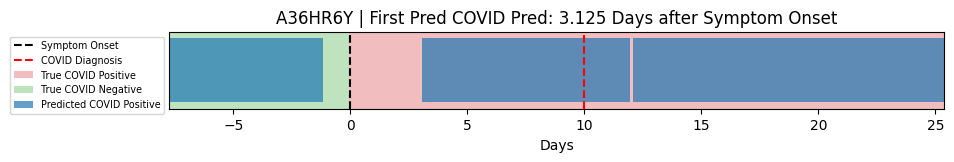

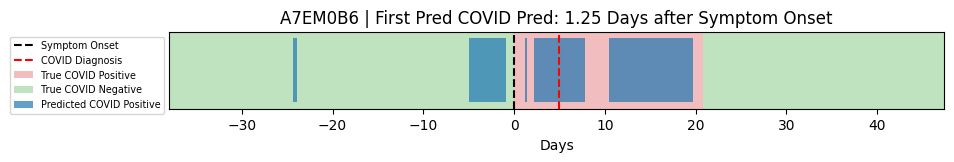

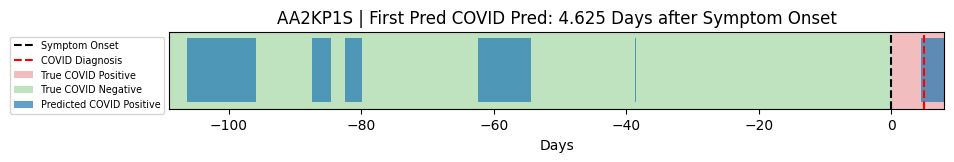

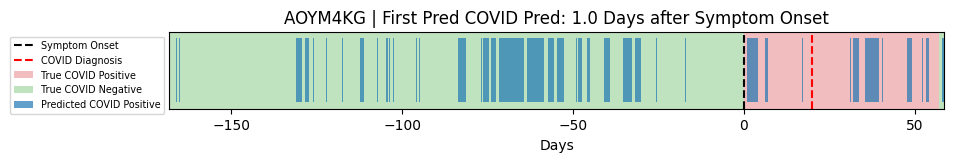

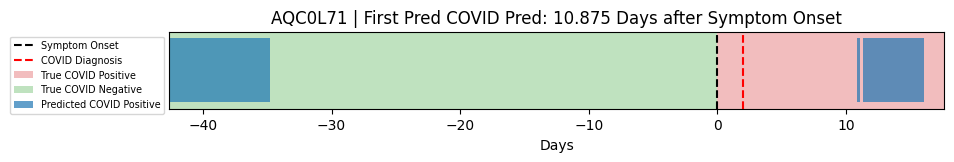

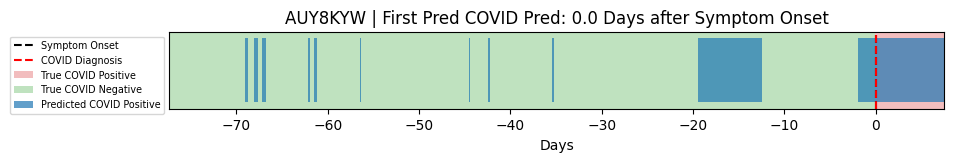

Average Days Late: 3.4791666666666665


In [14]:
import matplotlib.pyplot as plt 
save_folder = 'single_patient_plot/'
covid_list[1]

i = 3
offset = 0.1
days_after = []
for i in range(len(covid_list)):
  fig = plt.figure(figsize=(10, 1))
  #plt.axhline(0.5, color = 'k', linestyle = '--')
  plt.axvline(0, color = 'k', linestyle = '--', label = 'Symptom Onset')
  alpha = 0.3
  recovery_start = np.where(covid_list[i]['true'] == 1)[0][-1] + 1
  if recovery_start < covid_list[i]['days'][-1]:
    plt.axvline(covid_list[i]['days'][recovery_start], color = 'tab:brown', linestyle = '--', label = 'Recovery Start')

  pred_covid = covid_list[i]['pred'][np.where(covid_list[i]['true'] == 1)[0]]
  first_covid_pred = np.where(pred_covid == 1)[0]
  if len(first_covid_pred) == 0:
    first_covid_pred = np.nan
  else:
    first_covid_pred = first_covid_pred[0]*assumed_unit_time
  wid = assumed_unit_time
  days_after.append(first_covid_pred)

  plt.axvline(covid_list[i]['diagnosis'], color = 'r', linestyle = '--', label = 'COVID Diagnosis')
  plt.bar(covid_list[i]['days']+day_off, covid_list[i]['true']*(1 + offset), width = wid, alpha = alpha, color = 'tab:red')
  plt.bar(covid_list[i]['days']+day_off, -covid_list[i]['true']*offset, width = wid, alpha = alpha, color = 'tab:red', label = 'True COVID Positive')
  plt.bar(covid_list[i]['days']+day_off, -1*(covid_list[i]['true'] - 1)*(1 + offset), width = wid, alpha = alpha, color = 'tab:green')
  plt.bar(covid_list[i]['days']+day_off, (covid_list[i]['true'] - 1)*offset, width = wid, alpha = alpha, color = 'tab:green', label = 'True COVID Negative')
  plt.bar(covid_list[i]['days']+day_off, covid_list[i]['pred'], width = wid, alpha = 0.7, color = 'tab:blue', label = 'Predicted COVID Positive')
  plt.ylim([-offset, (1 + offset)])
  plt.yticks([])
  left, right = plt.xlim()
  #plt.xlim([covid_list[i]['days'][0], np.min([recovery_start+20, covid_list[i]['days'][-1]])])
  plt.xlim([covid_list[i]['days'][0], covid_list[i]['days'][-1]])
  plt.xlabel('Days')
  plt.title(covid_list[i]['name'] + ' | First Pred COVID Pred: ' + str(first_covid_pred) + ' Days after Symptom Onset')
  plt.legend(bbox_to_anchor=(0,1), fontsize = 'x-small')
  plt.show()
  fig.savefig(save_folder + covid_list[i]['name'] + '.png', bbox_inches='tight')

print('Average Days Late: {}'.format(np.mean(days_after)))

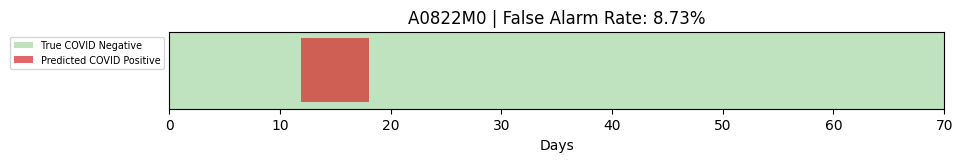

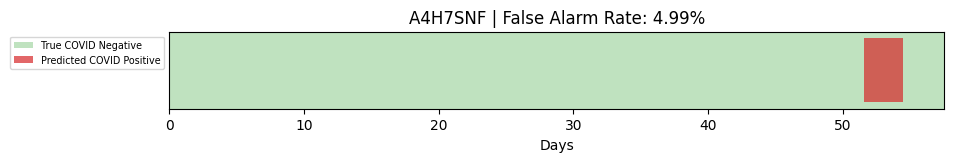

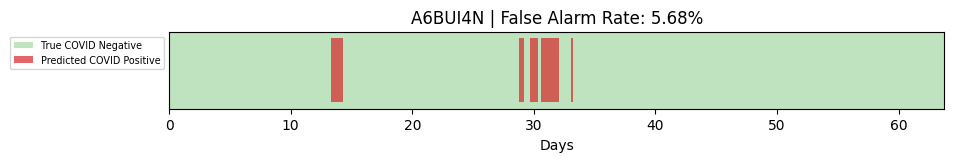

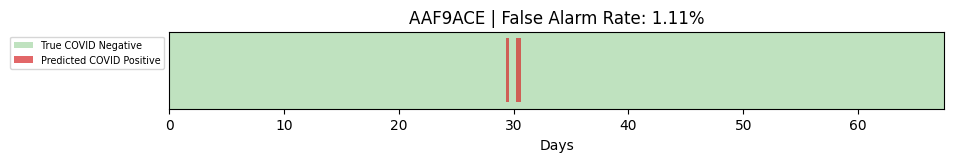

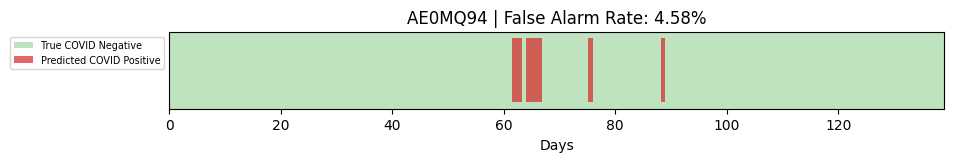

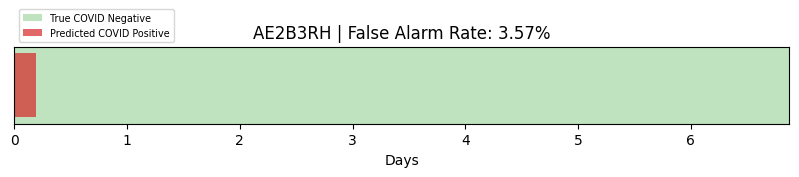

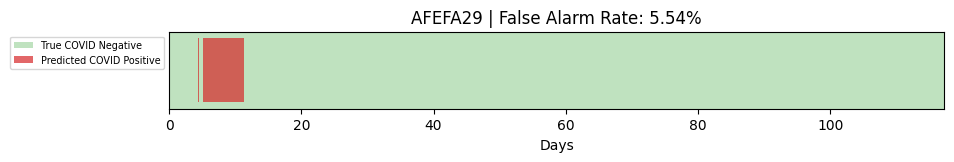

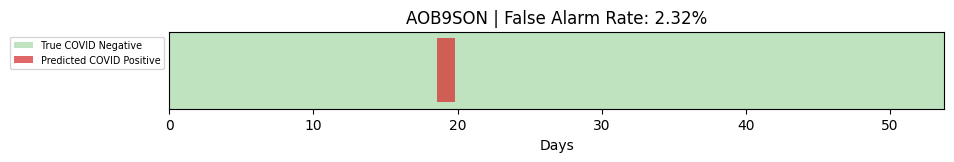

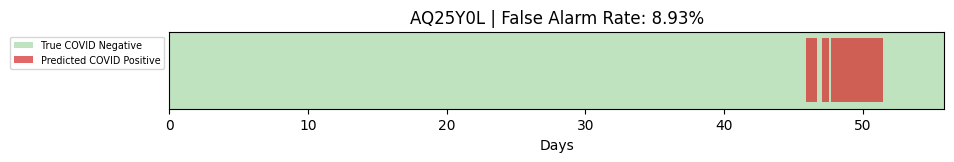

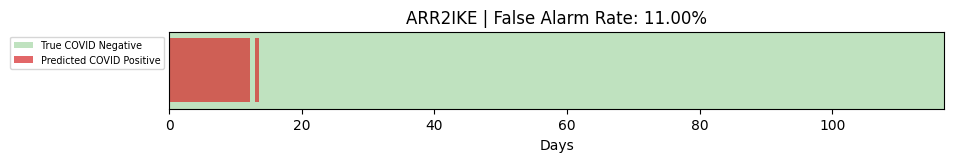

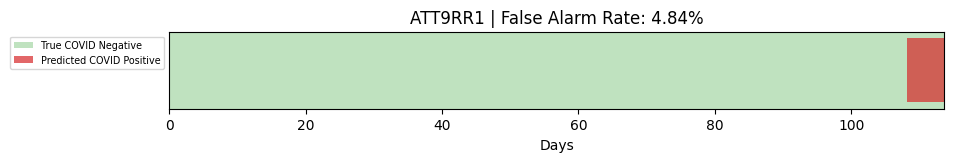

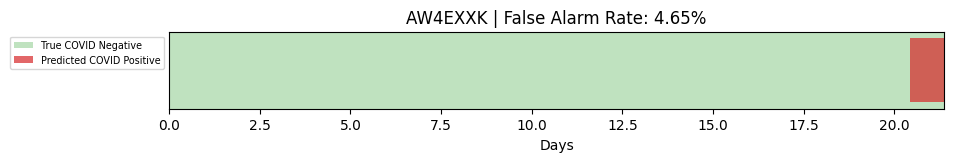

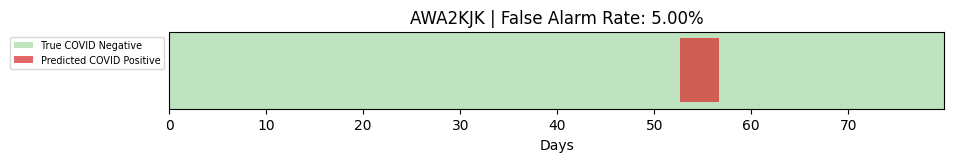

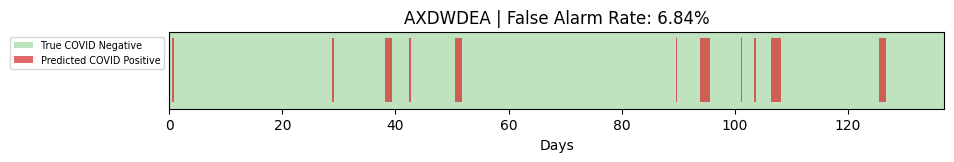

Average False Alarm Rate: 0.055553851295496046


In [15]:

fa_alarm = []
for i in range(len(healthy_list)):
  fig = plt.figure(figsize=(10, 1))
  #plt.axhline(0.5, color = 'k', linestyle = '--')
  # plt.axvline(0, color = 'k', linestyle = '--', label = 'Symptom Onset')
  alpha = 0.3

  alarm = np.where(healthy_list[i]['pred'] == 1)[0].size/healthy_list[i]['true'].size
  fa_alarm.append(alarm)
  plt.bar(healthy_list[i]['days']+day_off, -1*(healthy_list[i]['true'] - 1)*(1 + offset), width = wid, alpha = alpha, color = 'tab:green')
  plt.bar(healthy_list[i]['days']+day_off, (healthy_list[i]['true'] - 1)*offset, width = wid, alpha = alpha, color = 'tab:green', label = 'True COVID Negative')
  plt.bar(healthy_list[i]['days']+day_off, healthy_list[i]['pred'], width = wid, alpha = 0.7, color = 'tab:red', label = 'Predicted COVID Positive')
  plt.ylim([-offset, (1 + offset)])
  plt.yticks([])
  left, right = plt.xlim()
  plt.xlim([healthy_list[i]['days'][0], healthy_list[i]['days'][-1]])
  plt.xlabel('Days')
  plt.title(healthy_list[i]['name'] + ' | False Alarm Rate: ' + '{:.2f}'.format(alarm*100) + '%')
  plt.legend(bbox_to_anchor=(0,1), fontsize = 'x-small')
  plt.show()

  fig.savefig(save_folder + healthy_list[i]['name'] + '.png', bbox_inches='tight')
print('Average False Alarm Rate: {}'.format(np.mean(fa_alarm)))


In [ ]:
'{:.2f}'.format(alarm*100)

'8.73'

In [ ]:
covid_list[i]['days']

array([-9, -8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
       59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
       76, 77])

In [ ]:
covid_idx

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39])